### A deep (L-Layer) Neural Network from scratch
**We will :**
- Build  the general architecture of an L layer Neural Network  learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.
<img src=./data/deep_neural_network.png><img>

## 1 - Packages ##

import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
* [scikit-learn](http://scikit-learn.org/stable/) a library with Simple and efficient tools for data mining and data analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
np.random.seed(42)

## 2 - Dataset ##

we will use the make_classification data from sklearn

Loading the data by with the  following code.

In [4]:
X,Y=datasets.make_classification(n_samples=1000000, n_features=50,
                                    n_informative=50,n_classes=2, n_redundant=0,
                                    random_state=42)

## - Data-split  ##

we will split the data with the following distribution 
- 99% -training set
- 1% -test set

we will use the sklearn train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05,
                                                    random_state=42)

For convenience, we reshape the data into  a numpy-array of shape (1, m). After this, our training (and test) dataset is a numpy-array where each column represents one training example. There should be m_train (respectively m_test) columns.

In [6]:
# we need to reshape our data to column vectors 
X_train=X_train.reshape(X_train.shape[0],-1).T
X_test=X_test.reshape(X_test.shape[0],-1).T
y_train=y_train.reshape(y_train.shape[0],-1).T
y_test=y_test.reshape(y_test.shape[0],-1).T

## 3 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features,number of layers) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### We will now initialize the number of layers with the specific units in each layer
- We will store all these in a list called layer_dims
- The first layer has n_x dimensions and the output layer has one unit for binary classification

In [7]:
n_x,n_y=X_train.shape[0],y_train.shape[0]
layer_dims=[n_x,40,20,n_y]

- We can get the number of layers in the network from layer_dims

In [8]:
len(layer_dims)

4

### 1.1 We now initialize parameters for the network based on layer_dims values
- We provide a variety of ways to initialize the parameters to see the effects of different initialization techniques

In [57]:
def initialize_layers(layer_dims,initializer="random"):
    """
    This function initializes the parameters for different layers
    Arguments:
        layer_dims-> a list of layer dimensions 
        initializer -> type of initilization
    
    """
    #number of layers
    L=len(layer_dims)
    # variable for parameters
    parameters={}
    #create parameters
    if initializer=="random":
        for l in range(1,L):
            parameters["W"+ str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
            parameters["b"+str(l)]=np.zeros((layer_dims[l],1),dtype=float)
        return parameters
    elif initializer=="zeros":
        for l in range(1,L):
            parameters["W"+ str(l)]=np.zeros((layer_dims[l],layer_dims[l-1]),dtype=float)
            parameters["b"+str(l)]=np.zeros((layer_dims[l],1),dtype=float)
        return parameters
    elif initializer=="xavier":
        for l in range(1,L):
            parameters["W"+ str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
            parameters["b"+str(l)]=np.zeros((layer_dims[l],1),dtype=float)
        return parameters
    elif initializer=="He":
        for l in range(1,L):
            parameters["W"+ str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*np.sqrt(2/layer_dims[l-1])
            parameters["b"+str(l)]=np.zeros((layer_dims[l],1),dtype=float)
        return parameters
    

### We now define the various activations 

####  <center>  Relu function </center> 
#    <center>               $\max(0,Z)$</center> 


In [10]:
def relu(Z):
    """
    This function computes the relu activation 
    
    Arguments:
        Z-> Weighteds inputs (Z=W.TA+b)
    Returns:
        A->relu activations of Z
    """
    A=np.maximum(0,Z)
    
    return A


####  <center>  Tanh function </center> 
#    <center>               $\frac{\mathrm{e}^{z}-\mathrm{e}^{-z}}{\mathrm{e}^{z}+\mathrm{e}^{-z}}$</center> 

In [11]:
def tanh(Z):
    """
    This function computes the tanh activation 
    
    Arguments:
        Z-> Weighted inputs (Z=W.TA+b)
    Returns:
        A->tanh activations of Z
    """
    
    A=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    
    return A
    

####  <center>  Sigmoid function </center> 
#    <center>               $\frac{1}{1+\mathrm{e}^{-z}}$</center> 

In [12]:
def sigmoid(Z):
    """
    This function computes the sigmoid activation 
    
    Arguments:
        Z-> Weighted inputs (Z=W.TA+b)
    Returns:
        A->sigmoid activations of Z
    """
    A= 1/(1+np.exp(-Z))
    
    return A
    

### Linear forward computation
- we use the following function to compute the linear function 
- We compute $A^{l} = \sigma(W^{[l]^{T}} A^{[l-1]} + b^{[l]}) = (a^{(0)}, a^{(1)}, ..., a^{(n_l-1)}, a^{(n_l)})$

In [35]:
def linear_forward_computation(W,X,b, activation="relu"):
    """
    This function computes the Activations and Z values for a layer
    
    Arguments:
        W->weights
        X-> Activations 
        b-> biases
        activation-> the type of activation
    
    Returns:
        A-> activations 
        Z-> Z values (WX + b)
    
    """
    
    Z= np.dot(W,X)+b
    
    if activation=="relu":
        A=relu(Z)
    elif activation=="tanh":
        A=tanh(Z)
    elif activation == "sigmoid":
        A=sigmoid(Z)
    return A,Z

### forward propagation

**forward propagation:** Implementing forward propagation 

** for layer hidden layers **
- where l is layer number,L the total number of layers and n_l is the number of units in layer l
- We get $A^{[l-1]}$ where $A^{0} = X$
- We compute $A^{l} = \sigma(W^{[l]^{T}} A^{[l-1]} + b^{[l]}) = (a^{(0)}, a^{(1)}, ..., a^{(n_l-1)}, a^{(n_l)})$
- where  $\sigma$ is the  activation function 

** for output layer **
- We get layer [L-1] activations
- we compute $A^{[L]}=\sigma(W^{[L]^{T}} A^{[L-1]} + b^{[L]})=(a^{(0)}, a^{(1)}, ..., a^{(n_L-1)}, a^{(n_L)})$

In [14]:
def forward_propagate_deep(parameters, X):
    """
    This function computes the forward propagation for the network
    
    Arguments:
        parameters-> weights and biases for various layers
        X-> input features
    
    Returns:
        AL->final Activation Layer values
        cache-> a dictionary containing activations and Z values for layers
    
    """
    L=len(parameters)//2 
    cache={}
    A=X
    for i in range(1,L):
        A_Prev=A
        A,Z=linear_forward_computation(parameters["W"+str(i)],A_Prev,parameters["b"+str(i)],activation="relu")
        cache["Z"+str(i)]=Z
        cache["A"+str(i)]=A
    AL,ZL=linear_forward_computation(parameters["W"+str(L)],A,parameters["b"+str(L)],activation="sigmoid")

    return AL, cache
        
        
        
        
        

### Cost function

In [15]:
def compute_cost(AL,Y):
    """
    This function computes the cost of the Neural Network    
    
    Arguments:
        A-> Activations from the forward propagation
        Y-> The correct labels 
    Returns:
    
    """
    m=Y.shape[1]
    cost=-(1/m)*np.sum(Y*np.log(AL)+((1-Y)*np.log(1-AL)))
    
    return cost


### compute linear backpropagation  to get $dW^{[l]}$ and $db^{[l]}$

In [16]:
def linear_backward_computation(dZ,A_prev):
    """
    This function computes the gradients for the biases and weights for the a layer
    
    Arguments:
        dZ-> derivatives for a layer
        A_prev-> the Activations for the previous layer
        
    Returns:
        dw->weights gradients
        db-> bias gradients
    """
    m=A_prev.shape[1]
    dw=(1/m)*np.dot(dZ,A_prev.T)
    db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
    
    return dw,db

### Compute the derivatives $dz^{[l]}$

### Back propagation 

In [17]:
def back_propagate(cache,AL,parameters,X,Y,activation="relu"):
    """
    This function computes the backpropagation for the model
    
    Arguments:
        cache-> stored values for activations A and  Z values for layers
        AL-> activation for the final layer
        parameters-> weights and biases for various layers
        X-> inputs
        Y-> labels
    Returns:
        dZ-> derivative for the various Z values layers
        grads-> gradients for the various layers
    
    """
    L=len(parameters)//2
    dZ={}
    dZ["dZ"+str(L)]=AL-Y
    grads={}
    cache["A0"]=X
    grads["dW"+ str(L)],grads["db"+ str(L)]=linear_backward_computation(dZ["dZ"+str(L)],cache["A"+str(L-1)])
    
    
    
    for l in reversed(range(1,L)):
        dZ["dZ"+str(l)]=np.dot(parameters["W"+str(l+1)].T,dZ["dZ"+str(l+1)])*relu_derivative(cache["Z"+str(l)])
        grads["dW"+ str(l)],grads["db"+ str(l)]=linear_backward_computation(dZ["dZ"+str(l)],cache["A"+str(l-1)])
        
    return grads,dZ
        
        
        
    
    
    
        
        
        
        
    
    
    
    

### Relu derivative    <centre>$max({0},{1})$</centre>

In [18]:
def relu_derivative(A):
    """
    This function computes the derivative of the relu function Max(0,Z)->drelu=Max(0,1)
    drelu->returns 0 for all values below and including o and 1 for all other values
    Arguments:
        A->Activations
    Returns:
        Ad->relu derivative of A
    """
    
    Ad=np.choose(A>0,[0,1])
    return Ad

### Sigmoid derivative  $ \alpha(1-\alpha) $
- ### where $\alpha$= $\frac{1}{1+ \mathrm{e}^{-z}}$

In [36]:
def sigmoid_derivative(A):
    """
    This function computes the derivative of the sigmoid function
    the derivate evaluates to a(1-a) where a is the sigmoid function
    Arguments:
        A->Activations
    Returns:
        Ad->relu derivative of A
    """
    Ad=sigmoid(A)*(1-sigmoid(A))
    return Ad
    

### tanh derivative $1-tanh^2$

In [38]:
def tanh_derivative(A):
    """
    This function computes the derivative of the tanh function
    the derivate evaluates to (1-a*a) where a is the tanh function
    Arguments:
        A->Activations
    Returns:
        Ad->tanh derivative of A
    """
    Ad=(1-tanh(A)*tanh(A))
    return Ad

### Update parameters $W^{[l]}$ and $b^{[l]}$

In [39]:
def update_parameters(grads,parameters,learning_rate):
    """
    This function updates the parameters Weights and biases for the various layers
    
    Arguments:
        grads-> gradients
        parameters-> W and b values for the layers
        learning_rate-> the models learning rate
    Returns:
        parameters-> the updated parameters
    """
    for i in range(len(parameters)//2 ):
        parameters["W"+str(i+1)]=parameters["W"+str(i+1)]-learning_rate*grads["dW"+str(i+1)]
        parameters["b"+str(i+1)]=parameters["b"+str(i+1)]-learning_rate*grads["db"+str(i+1)]
    return parameters

### To train on minibatches using  gradient descent we create a function to generate minibatches

In [43]:
def minibatch(X,Y,batch_size=64,seed=0):
    """
    This function creates minibatches given X and Y
    Arguments:
        X-> features
        Y-> labels
        batch_size-> size of batch to use
        seed-> numpy seed to generate 
    Returns:
        minibatches-> a list of minibatches generated
    
    """
    
    np.random.seed(seed)
    m=X_train.shape[1]
    number_of_batches=m//batch_size
    permutation = list(np.random.permutation(m))
    shuffled_X=X[:,permutation]
    shuffled_Y=Y[:,permutation].reshape(1,m)
    minibatches=[]
    for k in range(number_of_batches):
        mini_batch_X=shuffled_X[:,k*batch_size:(k+1)*batch_size]
        mini_batch_y=shuffled_Y[:,k*batch_size:(k+1)*batch_size]
        minibatch=(mini_batch_X,mini_batch_y)
        minibatches.append(minibatch)
    if m%batch_size!=0:
        last_batch_X=shuffled_X[:,number_of_batches*batch_size:m]
        last_batch_y=shuffled_Y[:,number_of_batches*batch_size:m]
        last_mini_batch=(last_batch_X,last_batch_y)
        minibatches.append(last_mini_batch)
    return minibatches
        

### predict 

In [44]:
def predict(parameters,X):
    """
    This function returns the predictions for a binary classification problem
    Arguments:
        parameters-> a dictionary containing weights and biases
        X-> input features
    Returns:
        predictions-> binary classification predictions
    """
    AL,ZL=forward_propagate_deep(parameters,X)
    predictions = np.choose(AL<0.5,[1,0])
    return predictions

### Create the model by combining the above functions

In [55]:
def model(X,Y,num_iterations,learning_rate,layer_dims,batch_size=1,initializer="random"):
    """
    This function creates a  L layer neural network model 
    Arguments:
        X-> input features matrix
        y-> labels vector
        num_iterations-> number of iterations
        learning_rate-> the learning rate
        layer_dims-> a list with dimensions for the various layers
        batch_size -> minibatch size to train 
    Returns:
        parameters-> a dictionary containing learnt parameters
        costs-> a list with costs progression over time
    
    """
    parameters=initialize_layers(layer_dims, initializer=initializer)
    seed=10
    costs=[]
    for i in range(num_iterations):
        
        seed=seed+1
            # evaluate cost and cost_summary 
        minibatches=minibatch(X_train,y_train,batch_size=batch_size,seed=seed)
        for mini_batch in minibatches:
            (minibatch_X,minibatch_Y)= mini_batch
            AL,cache=forward_propagate_deep(parameters=parameters,X=minibatch_X)
            cost= compute_cost(AL,minibatch_Y)
            grads,dZ=back_propagate(cache,AL,parameters,minibatch_X,minibatch_Y,activation="relu")
            parameters=update_parameters(grads,parameters,learning_rate)
            costs.append(cost)
        print(cost)
        predictions= predict(parameters,X)
        print("train accuracy on epoch {} is {} %".format(i,(100 - np.mean(np.abs(predictions - Y)) * 100)))
        
    return parameters,costs

In [66]:
def plot_cost_vs_iters(costs, initialization):
    """
    This function plots the costs vs number of  iteration
    
    Arguments:
        costs-> a list of costs
        initialization-> the initialization used
    """
    
    plt.figure(figsize=(20,20))
    plt.title("Cost vs iterations with mini-batch gradient descent and {} in initialization".format(initialization))
    plt.xlabel("No of iterations ")
    plt.ylabel("Cost")
    plt.grid(True)
    plt.plot(costs)
    plt.show()
    

In [75]:
layer_dims=[n_x,100,50,n_y]
params,costs=model(X_train,y_train,10,0.001,layer_dims,batch_size=128)

0.692202095877
train accuracy on epoch 0 is 74.89126315789474 %
0.65559781877
train accuracy on epoch 1 is 78.55715789473685 %
0.298773793882
train accuracy on epoch 2 is 91.01557894736843 %
0.0933495114734
train accuracy on epoch 3 is 97.69084210526316 %
0.0871278845206
train accuracy on epoch 4 is 98.76168421052631 %
0.0745828517365
train accuracy on epoch 5 is 99.05631578947369 %
0.0679712364919
train accuracy on epoch 6 is 99.17210526315789 %
0.108476811836
train accuracy on epoch 7 is 99.23705263157895 %
0.00768925223983
train accuracy on epoch 8 is 99.28105263157894 %
0.014052624412
train accuracy on epoch 9 is 99.314 %


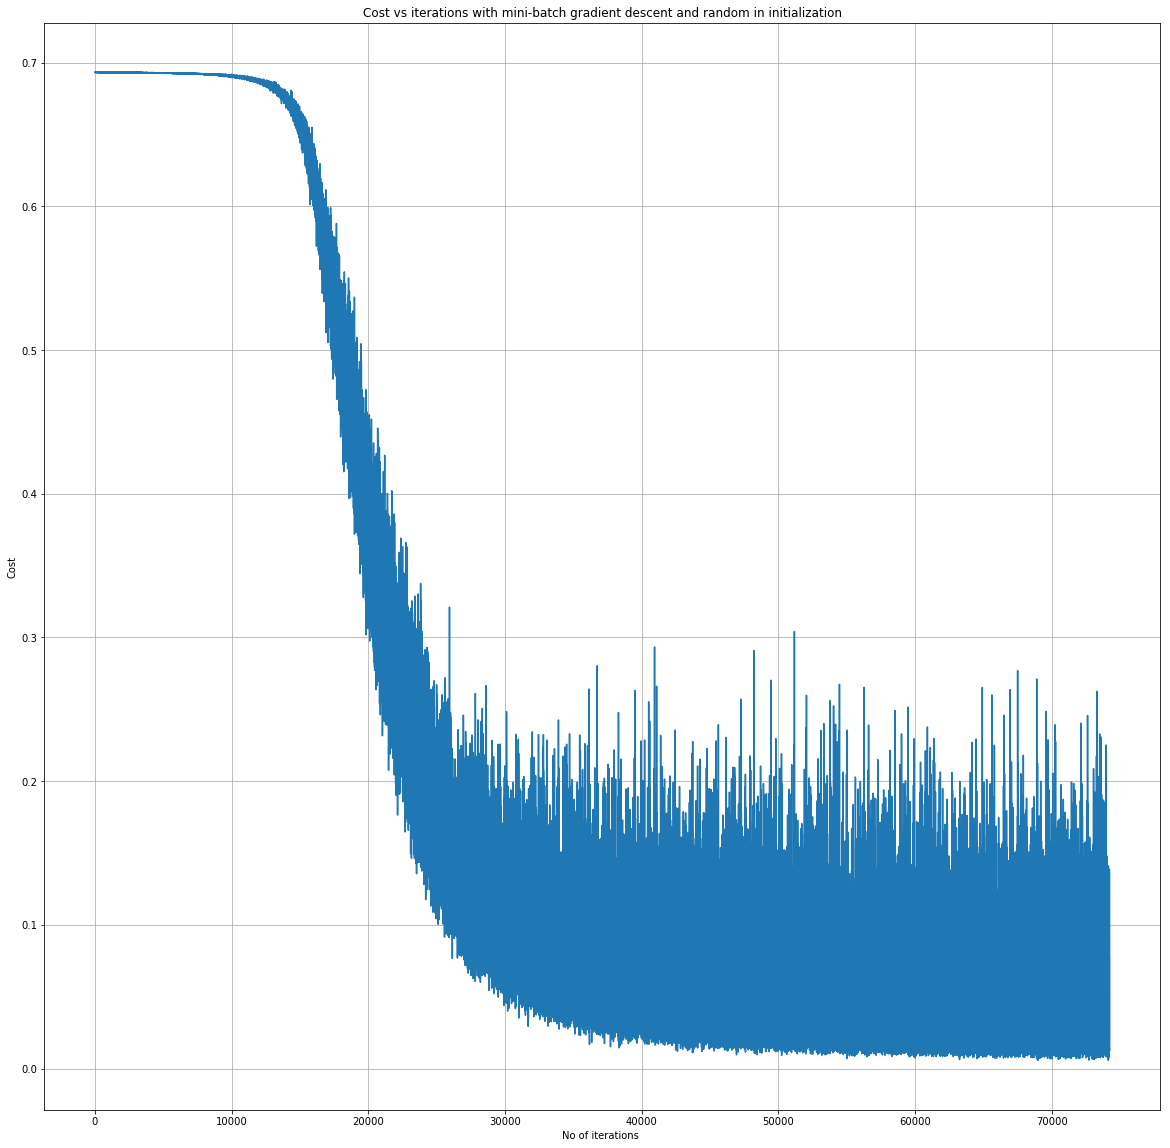

In [76]:
plot_cost_vs_iters(costs,initialization="random")

### Evaluating on our Test data

In [77]:
test_predictions=predict(params,X_test)
print("test accuracy  is {} %".format(100 - np.mean(np.abs(test_predictions - y_test) * 100)))

test accuracy  is 99.268 %


In [81]:
layer_dims=[n_x,100,50,n_y]
params,costs=model(X_train,y_train,10,0.001,layer_dims,batch_size=128,initializer="He")

0.159668137406
train accuracy on epoch 0 is 91.48242105263158 %
0.109753261619
train accuracy on epoch 1 is 94.71252631578948 %
0.130411900429
train accuracy on epoch 2 is 96.11010526315789 %
0.122936808273
train accuracy on epoch 3 is 96.87273684210527 %
0.108498149936
train accuracy on epoch 4 is 97.34231578947369 %
0.0825259555129
train accuracy on epoch 5 is 97.65789473684211 %
0.115044764702
train accuracy on epoch 6 is 97.89357894736843 %
0.15141772343
train accuracy on epoch 7 is 98.0682105263158 %
0.0274467934619
train accuracy on epoch 8 is 98.20842105263158 %
0.0518421281199
train accuracy on epoch 9 is 98.31515789473684 %


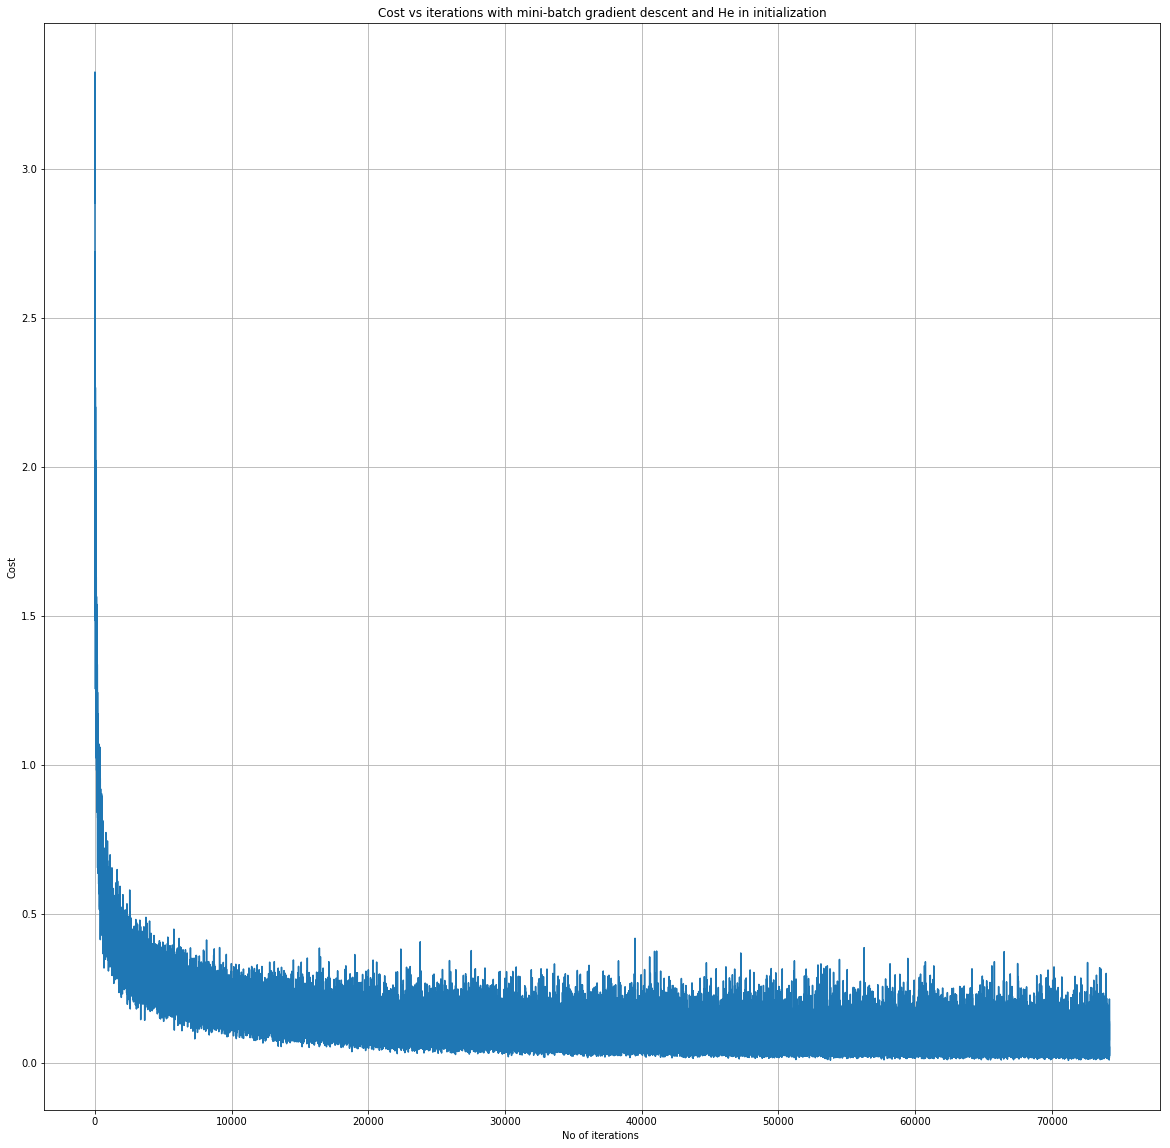

In [82]:
plot_cost_vs_iters(costs,initialization="He")

In [83]:
test_predictions=predict(params,X_test)
print("test accuracy  is {} %".format(100 - np.mean(np.abs(test_predictions - y_test) * 100)))

test accuracy  is 98.262 %


In [ ]:
layer_dims=[n_x,100,50,n_y]
params,costs=model(X_train,y_train,10,0.001,layer_dims,batch_size=128,initializer="zeros")

0.693140942276
train accuracy on epoch 0 is 50.00536842105263 %


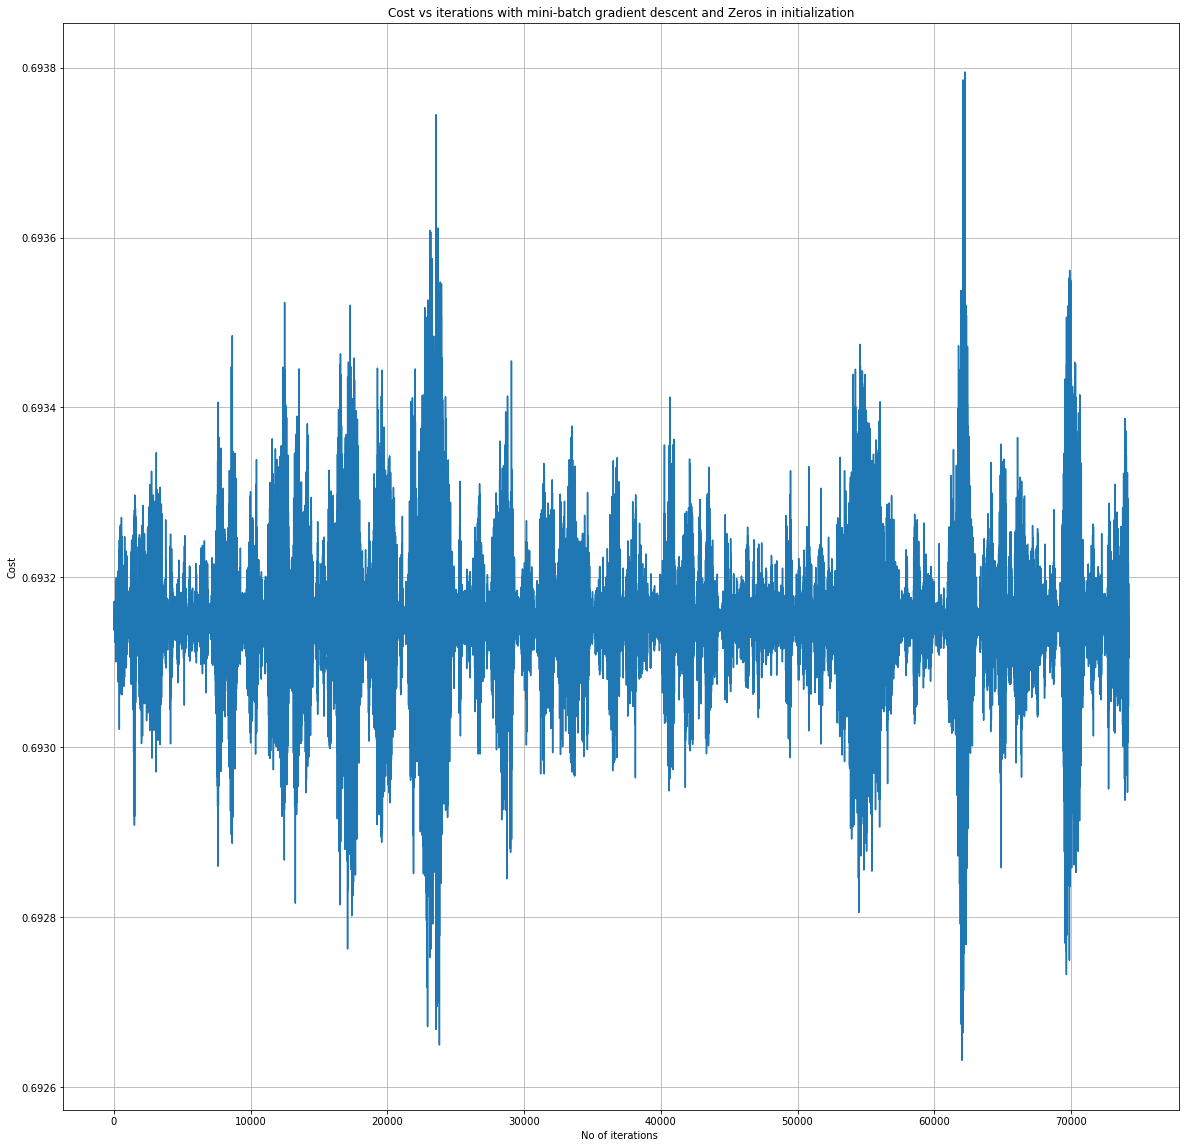

In [74]:
plot_cost_vs_iters(costs,initialization="Zeros")

### These graphs indicate the varios initialization techniques and how they impact training